In [1]:
pip install fastf1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import fastf1 as ff1
from fastf1 import plotting
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

from matplotlib import cm

from timple.timedelta import strftimedelta
from fastf1.core import Laps

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Configuración de gráficos
ff1.plotting.setup_mpl()

# Habilitación de caché 
ff1.Cache.enable_cache('cache')

# Ignorar warnings
pd.options.mode.chained_assignment = None

C:\Users\aleja\anaconda3\lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
C:\Users\aleja\anaconda3\lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


## CARGA DE DATOS DE CARRERA

### Temporada

2025

### Gran Premio

Austria

### Sesión

Qualy

In [3]:
session = ff1.get_session(2025, 'Austria','Q')
session.load()
laps = session.laps

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '44', '63', '30', '1', '5', '12',

In [4]:
print(session)

2025 Season Round 11: Austrian Grand Prix - Qualifying


In [26]:
# SELECCIONAMOS LOS PILOTOS
first_driver = 'PIA'
second_driver = 'NOR'

# ASIGNAMOS COLORES
first_color = ff1.plotting.get_team_color('MCL',session)
second_color = ff1.plottin.ge_team_color('RBR',session)

# ASIGNAMOS TITULOS
plot_title = 'Piastri vs Norris, Austria 2025 Q3'
second_plot_title = 'Oscar Piastri (81) Mapa de marchas'

speedmap_first_title = 'Mapa de velocidad Oscar Piastri'

# CARGAMOS LAS VUELTAS
first = session.laps.pick_drivers(first_driver).pick_fastest()
second = session.laps.pick_drivers(second_driver).pick_fastest()


req            INFO 	Using cached data for driver_info


KeyError: '2025'

In [9]:
# VISUALIZACIÓN DE LAS VUELTAS PIA
first_car_data = first.get_car_data().add_distance()
first_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2025-06-28 15:05:03.859,11702,294,7,99,False,12,car,0 days 00:00:00.119000,0 days 01:17:25.057000,9.718333
1,2025-06-28 15:05:04.059,11796,296,7,99,False,12,car,0 days 00:00:00.319000,0 days 01:17:25.257000,26.162778
2,2025-06-28 15:05:04.340,10570,299,7,99,False,12,car,0 days 00:00:00.600000,0 days 01:17:25.538000,49.501389
3,2025-06-28 15:05:04.740,10648,302,8,99,False,12,car,0 days 00:00:01,0 days 01:17:25.938000,83.056944
4,2025-06-28 15:05:04.980,10700,304,8,99,False,12,car,0 days 00:00:01.240000,0 days 01:17:26.178000,103.323611
5,2025-06-28 15:05:05.260,10759,306,8,99,False,12,car,0 days 00:00:01.520000,0 days 01:17:26.458000,127.123611
6,2025-06-28 15:05:05.540,10825,308,8,99,False,12,car,0 days 00:00:01.800000,0 days 01:17:26.738000,151.079167
7,2025-06-28 15:05:05.739,10888,310,8,99,False,12,car,0 days 00:00:01.999000,0 days 01:17:26.937000,168.215278
8,2025-06-28 15:05:05.979,10958,311,8,99,False,12,car,0 days 00:00:02.239000,0 days 01:17:27.177000,188.948611
9,2025-06-28 15:05:07.059,11114,315,8,99,False,12,car,0 days 00:00:03.319000,0 days 01:17:28.257000,283.448611


In [10]:
# VISUALIZACIÓN DE LAS VUELTAS NOR
second_car_data = second.get_car_data().add_distance()
second_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2025-06-28 15:12:22.301,11465,296,7,100,False,14,car,0 days 00:00:00.110000,0 days 01:24:43.499000,9.044444
1,2025-06-28 15:12:22.701,10580,299,8,99,False,14,car,0 days 00:00:00.510000,0 days 01:24:43.899000,42.266667
2,2025-06-28 15:12:23.501,10790,306,8,99,False,14,car,0 days 00:00:01.310000,0 days 01:24:44.699000,110.266667
3,2025-06-28 15:12:23.821,10882,309,8,99,False,14,car,0 days 00:00:01.630000,0 days 01:24:45.019000,137.733333
4,2025-06-28 15:12:24.061,10973,311,8,99,False,14,car,0 days 00:00:01.870000,0 days 01:24:45.259000,158.466667
5,2025-06-28 15:12:24.261,10967,312,8,99,False,14,car,0 days 00:00:02.070000,0 days 01:24:45.459000,175.800000
6,2025-06-28 15:12:24.461,10967,313,8,99,False,14,car,0 days 00:00:02.270000,0 days 01:24:45.659000,193.188889
7,2025-06-28 15:12:24.741,11091,314,8,99,False,14,car,0 days 00:00:02.550000,0 days 01:24:45.939000,217.611111
8,2025-06-28 15:12:24.982,11100,315,8,99,False,14,car,0 days 00:00:02.791000,0 days 01:24:46.180000,238.698611
9,2025-06-28 15:12:25.181,11112,316,8,99,False,14,car,0 days 00:00:02.990000,0 days 01:24:46.379000,256.166389


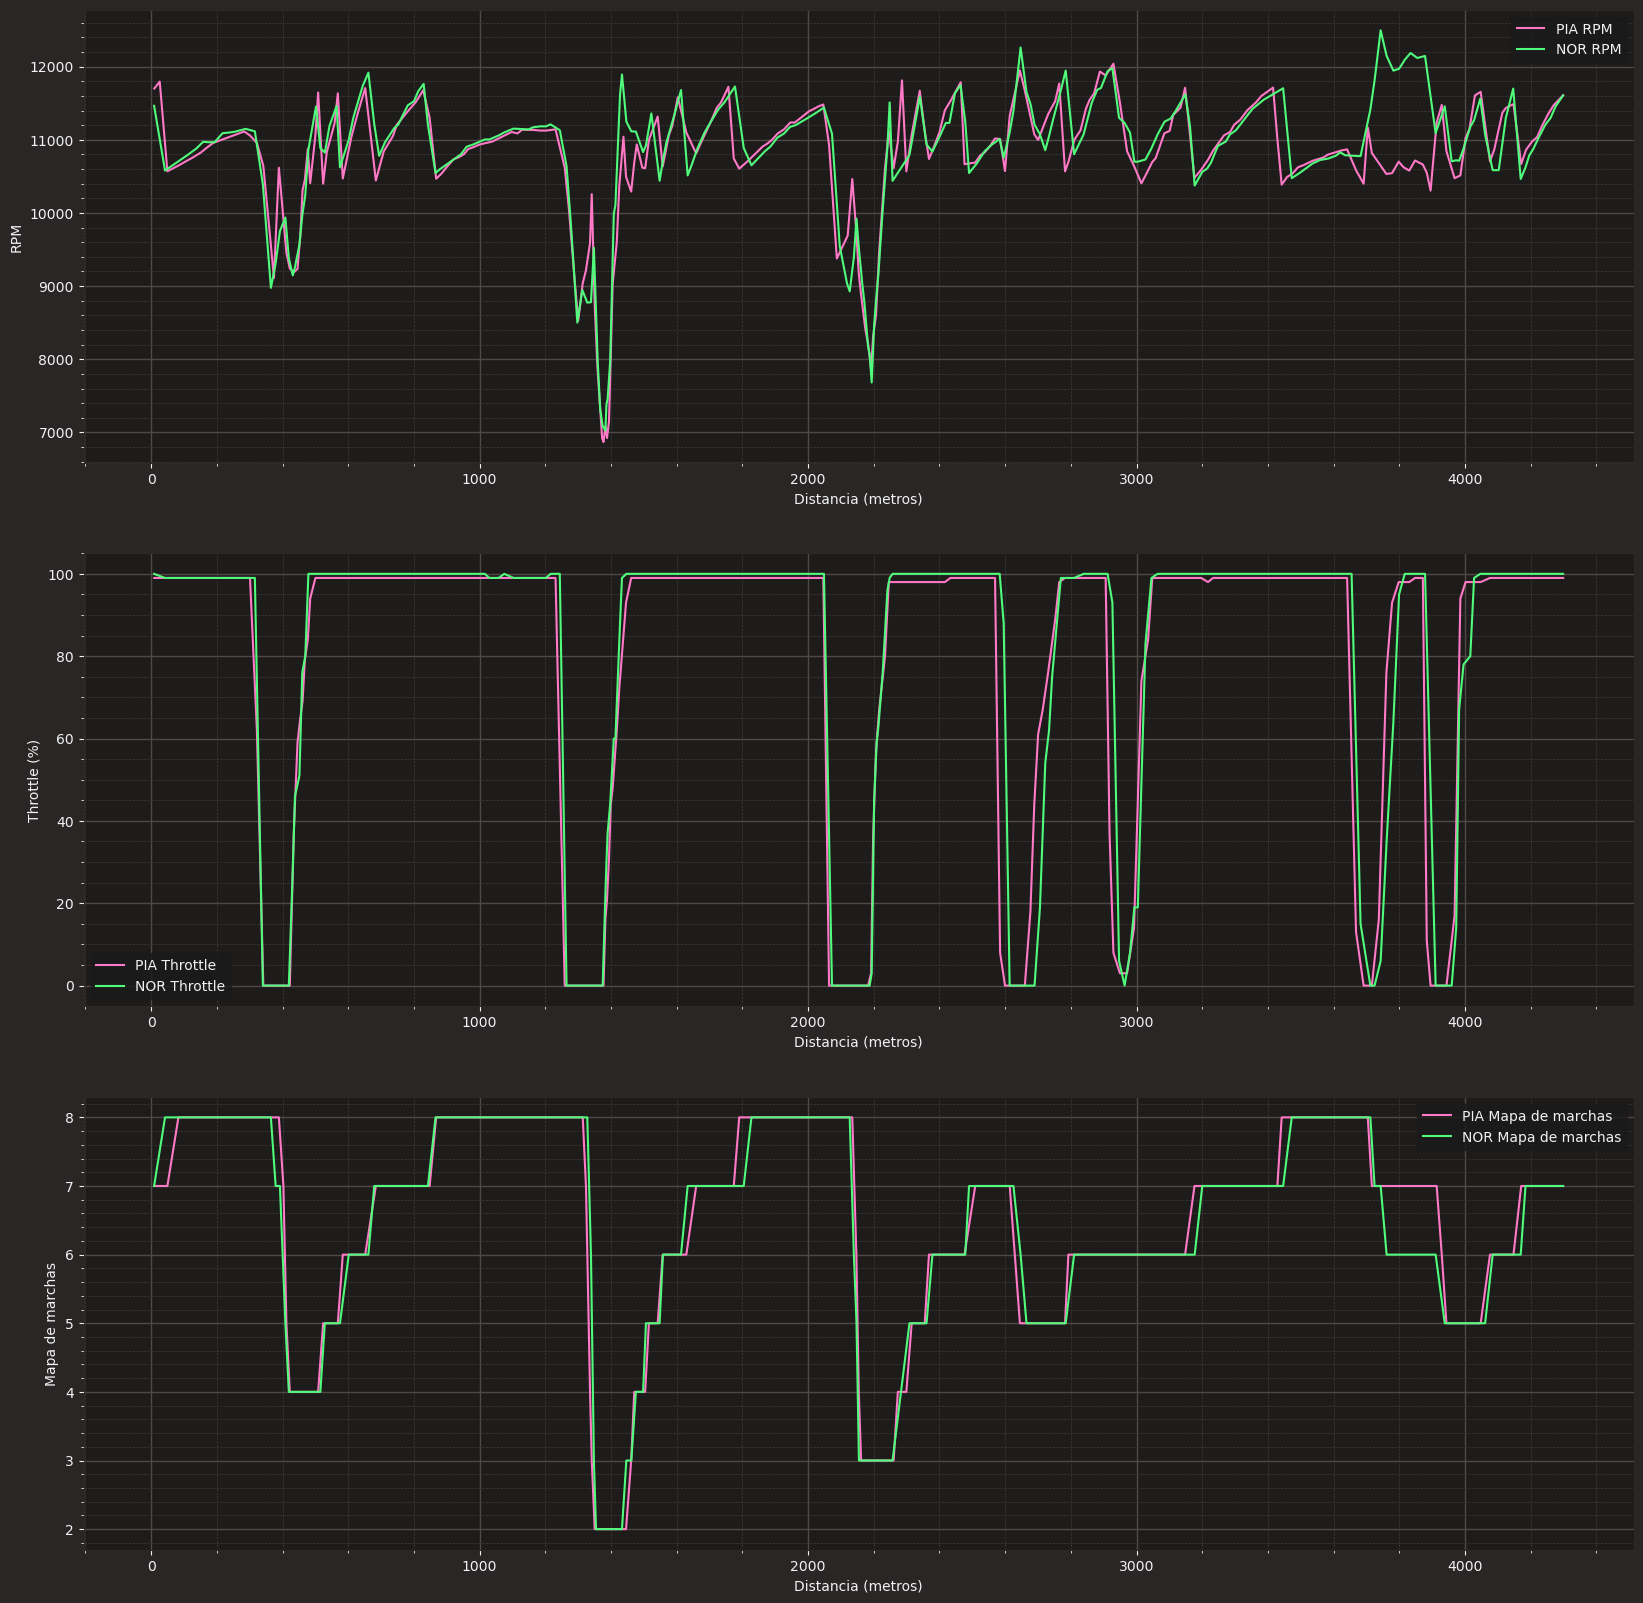

In [29]:
# PLOT PIA RPM

first_rpm = first_car_data['RPM']
first_tps = first_car_data['Throttle']
first_distance = first_car_data['Distance']
first_gear = first_car_data['nGear']

# PLOT NOR RPM

second_rpm = second_car_data['RPM']
second_tps = second_car_data['Throttle']
second_distance = second_car_data['Distance']
second_gear = second_car_data['nGear']

fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(20,20))


ax1.plot(first_distance, first_rpm, label='{} RPM'.format(first_driver))
ax1.plot(second_distance,second_rpm, label='{} RPM'.format(second_driver))
ax1.set_xlabel('Distancia (metros)')
ax1.set_ylabel('RPM')
ax1.legend()

ax2.plot(first_distance, first_tps, label='{} Throttle'.format(first_driver))
ax2.plot(second_distance, second_tps, label='{} Throttle'.format(second_driver))
ax2.set_xlabel('Distancia (metros)')
ax2.set_ylabel('Throttle (%)')
ax2.legend()

ax3.plot(first_distance, first_gear, label='{} Mapa de marchas'.format(first_driver))
ax3.plot(second_distance, second_gear, label='{} Mapa de marchas'.format(second_driver))
ax3.set_xlabel('Distancia (metros)')
ax3.set_ylabel('Mapa de marchas')
ax3.legend()

plt.show()

In [30]:
# MAPA DE MARCHAS PARA PIA

first_pos_data = first.get_pos_data()
first_pos_data

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2025-06-28 15:05:03.776,OnTrack,1075,-1215,7215,pos,0 days 00:00:00.036000,0 days 01:17:24.974000
1,2025-06-28 15:05:04.056,OnTrack,854,-1275,7214,pos,0 days 00:00:00.316000,0 days 01:17:25.254000
2,2025-06-28 15:05:04.216,OnTrack,727,-1309,7214,pos,0 days 00:00:00.476000,0 days 01:17:25.414000
3,2025-06-28 15:05:04.556,OnTrack,423,-1391,7214,pos,0 days 00:00:00.816000,0 days 01:17:25.754000
4,2025-06-28 15:05:04.816,OnTrack,246,-1439,7214,pos,0 days 00:00:01.076000,0 days 01:17:26.014000
5,2025-06-28 15:05:05.016,OnTrack,83,-1483,7214,pos,0 days 00:00:01.276000,0 days 01:17:26.214000
6,2025-06-28 15:05:05.376,OnTrack,-244,-1572,7215,pos,0 days 00:00:01.636000,0 days 01:17:26.574000
7,2025-06-28 15:05:05.796,OnTrack,-558,-1656,7219,pos,0 days 00:00:02.056000,0 days 01:17:26.994000
8,2025-06-28 15:05:05.836,OnTrack,-591,-1665,7219,pos,0 days 00:00:02.096000,0 days 01:17:27.034000
9,2025-06-28 15:05:06.076,OnTrack,-791,-1719,7223,pos,0 days 00:00:02.336000,0 days 01:17:27.274000


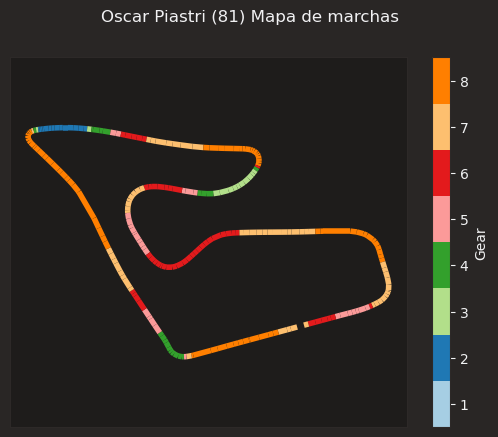

In [34]:
x = np.array(first_pos_data['X'].values)
y = np.array(first_pos_data['Y'].values)

points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = first_car_data['nGear'].to_numpy().astype(float)

# GRAFICAMOS
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(second_plot_title)

cbar = plt.colorbar(mappable=lc_comp, label='Gear', boundaries = np.arange(1,10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.show()

In [35]:
second_pos_data = second.get_pos_data()
second_pos_data

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2025-06-28 15:12:22.317,OnTrack,1003,-1235,7215,pos,0 days 00:00:00.126000,0 days 01:24:43.515000
1,2025-06-28 15:12:22.557,OnTrack,749,-1303,7214,pos,0 days 00:00:00.366000,0 days 01:24:43.755000
2,2025-06-28 15:12:22.996,OnTrack,426,-1390,7214,pos,0 days 00:00:00.805000,0 days 01:24:44.194000
3,2025-06-28 15:12:23.376,OnTrack,150,-1465,7214,pos,0 days 00:00:01.185000,0 days 01:24:44.574000
4,2025-06-28 15:12:23.536,OnTrack,19,-1500,7215,pos,0 days 00:00:01.345000,0 days 01:24:44.734000
5,2025-06-28 15:12:23.696,OnTrack,-112,-1536,7214,pos,0 days 00:00:01.505000,0 days 01:24:44.894000
6,2025-06-28 15:12:24.036,OnTrack,-427,-1621,7217,pos,0 days 00:00:01.845000,0 days 01:24:45.234000
7,2025-06-28 15:12:24.376,OnTrack,-677,-1689,7221,pos,0 days 00:00:02.185000,0 days 01:24:45.574000
8,2025-06-28 15:12:24.636,OnTrack,-929,-1756,7227,pos,0 days 00:00:02.445000,0 days 01:24:45.834000
9,2025-06-28 15:12:24.936,OnTrack,-1147,-1816,7234,pos,0 days 00:00:02.745000,0 days 01:24:46.134000


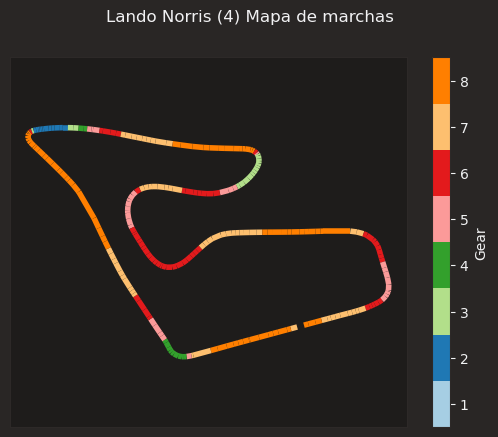

In [36]:
x = np.array(first_pos_data['X'].values)
y = np.array(first_pos_data['Y'].values)

points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = second_car_data['nGear'].to_numpy().astype(float)

# GRAFICAMOS
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle('Lando Norris (4) Mapa de marchas')

cbar = plt.colorbar(mappable=lc_comp, label='Gear', boundaries = np.arange(1,10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.show()

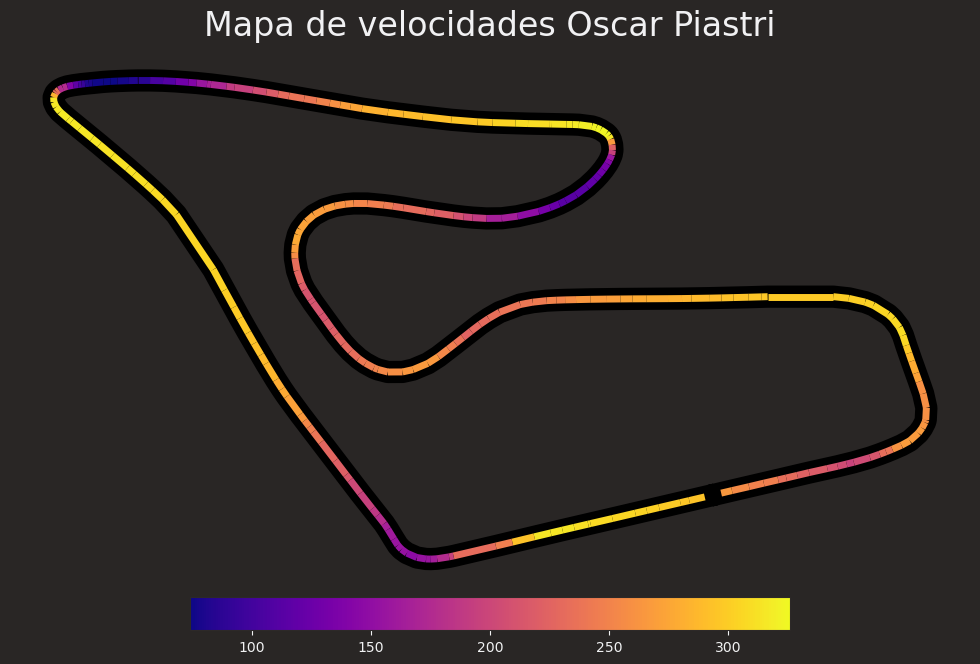

In [42]:
# MAPA DE VELOCIDAD
# Obtenemos datos telemétricos

x = np.array(first_pos_data['X'].values)
y = np.array(first_pos_data['Y'].values)
color = first_car_data['Speed']

points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = first_car_data['nGear'].to_numpy().astype(float)

# GRAFICAMOS
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle('Mapa de velocidades Oscar Piastri',size=24, y=0.97)

# Ajustamos márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# Graficamos la información
ax.plot(
    np.array(first_pos_data['X'].values),
    np.array(first_pos_data['Y'].values),
    color='black',
    linestyle='-',
    linewidth=16,
    zorder=0
)

# Creamos norma 
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=mpl.cm.plasma, norm=norm, linestyle='-', linewidth=5)
lc.set_array(color)
line = ax.add_collection(lc)

# Creamos barra de colores
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.cm.plasma, orientation='horizontal')

plt.show()

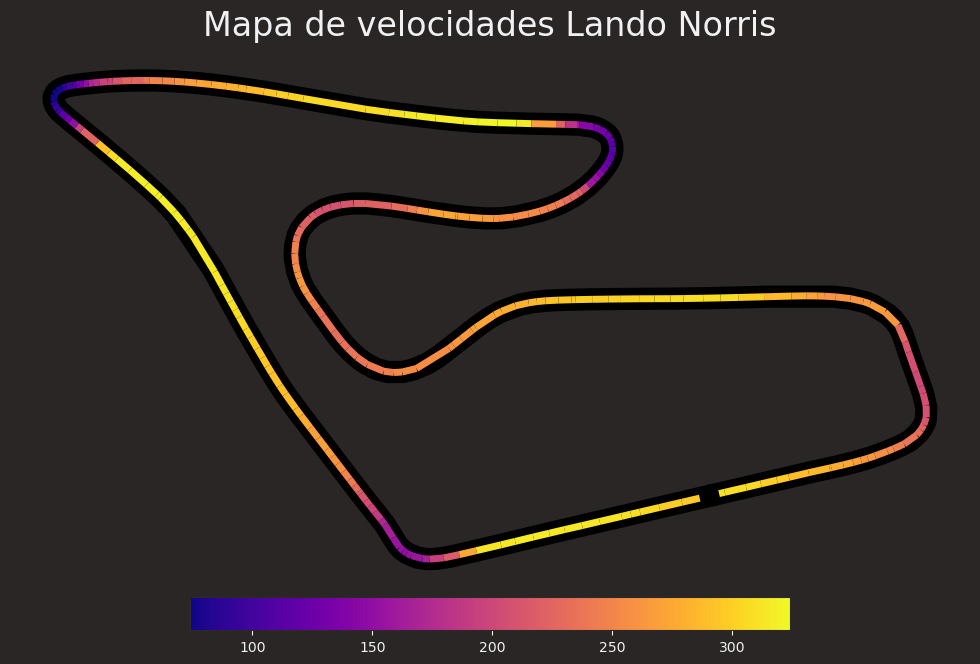

In [43]:
# MAPA DE VELOCIDAD
# Obtenemos datos telemétricos

x = np.array(second_pos_data['X'].values)
y = np.array(second_pos_data['Y'].values)
color = second_car_data['Speed']

points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = first_car_data['nGear'].to_numpy().astype(float)

# GRAFICAMOS
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle('Mapa de velocidades Lando Norris',size=24, y=0.97)

# Ajustamos márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# Graficamos la información
ax.plot(
    np.array(first_pos_data['X'].values),
    np.array(first_pos_data['Y'].values),
    color='black',
    linestyle='-',
    linewidth=16,
    zorder=0
)

# Creamos norma 
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=mpl.cm.plasma, norm=norm, linestyle='-', linewidth=5)
lc.set_array(color)
line = ax.add_collection(lc)

# Creamos barra de colores
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.cm.plasma, orientation='horizontal')

plt.show()